In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, StandardScaler

column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv('iris.data.csv', header=None, names=column_names)

print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [3]:
print("Форма датасета:", df.shape)
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")

Форма датасета: (150, 5)
Количество строк: 150
Количество столбцов: 5


In [4]:
print(df.columns.tolist())

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


C:\Users\a\AppData\Local\Temp\ipykernel_10580\522429557.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.index, y=corr.values, palette='coolwarm')


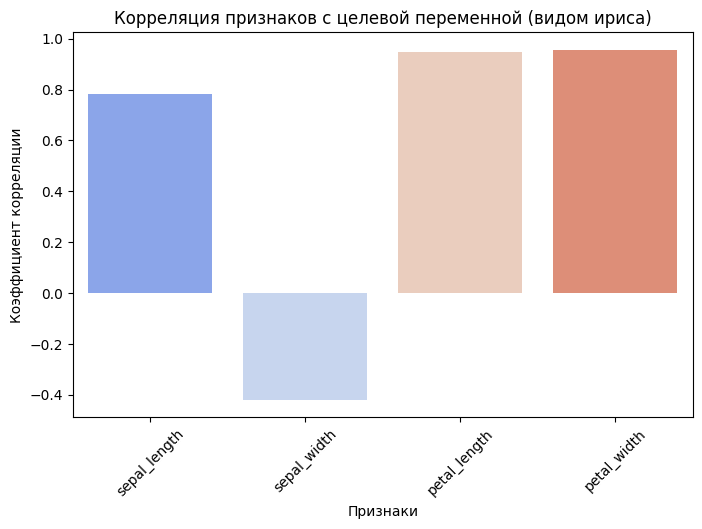

In [5]:
df['species_encoded'] = df['species'].astype('category').cat.codes

corr = df.corr(numeric_only=True)['species_encoded'].drop('species_encoded')

plt.figure(figsize=(8, 5))
sns.barplot(x=corr.index, y=corr.values, palette='coolwarm')
plt.title("Корреляция признаков с целевой переменной (видом ириса)")
plt.ylabel("Коэффициент корреляции")
plt.xlabel("Признаки")
plt.xticks(rotation=45)
plt.show()

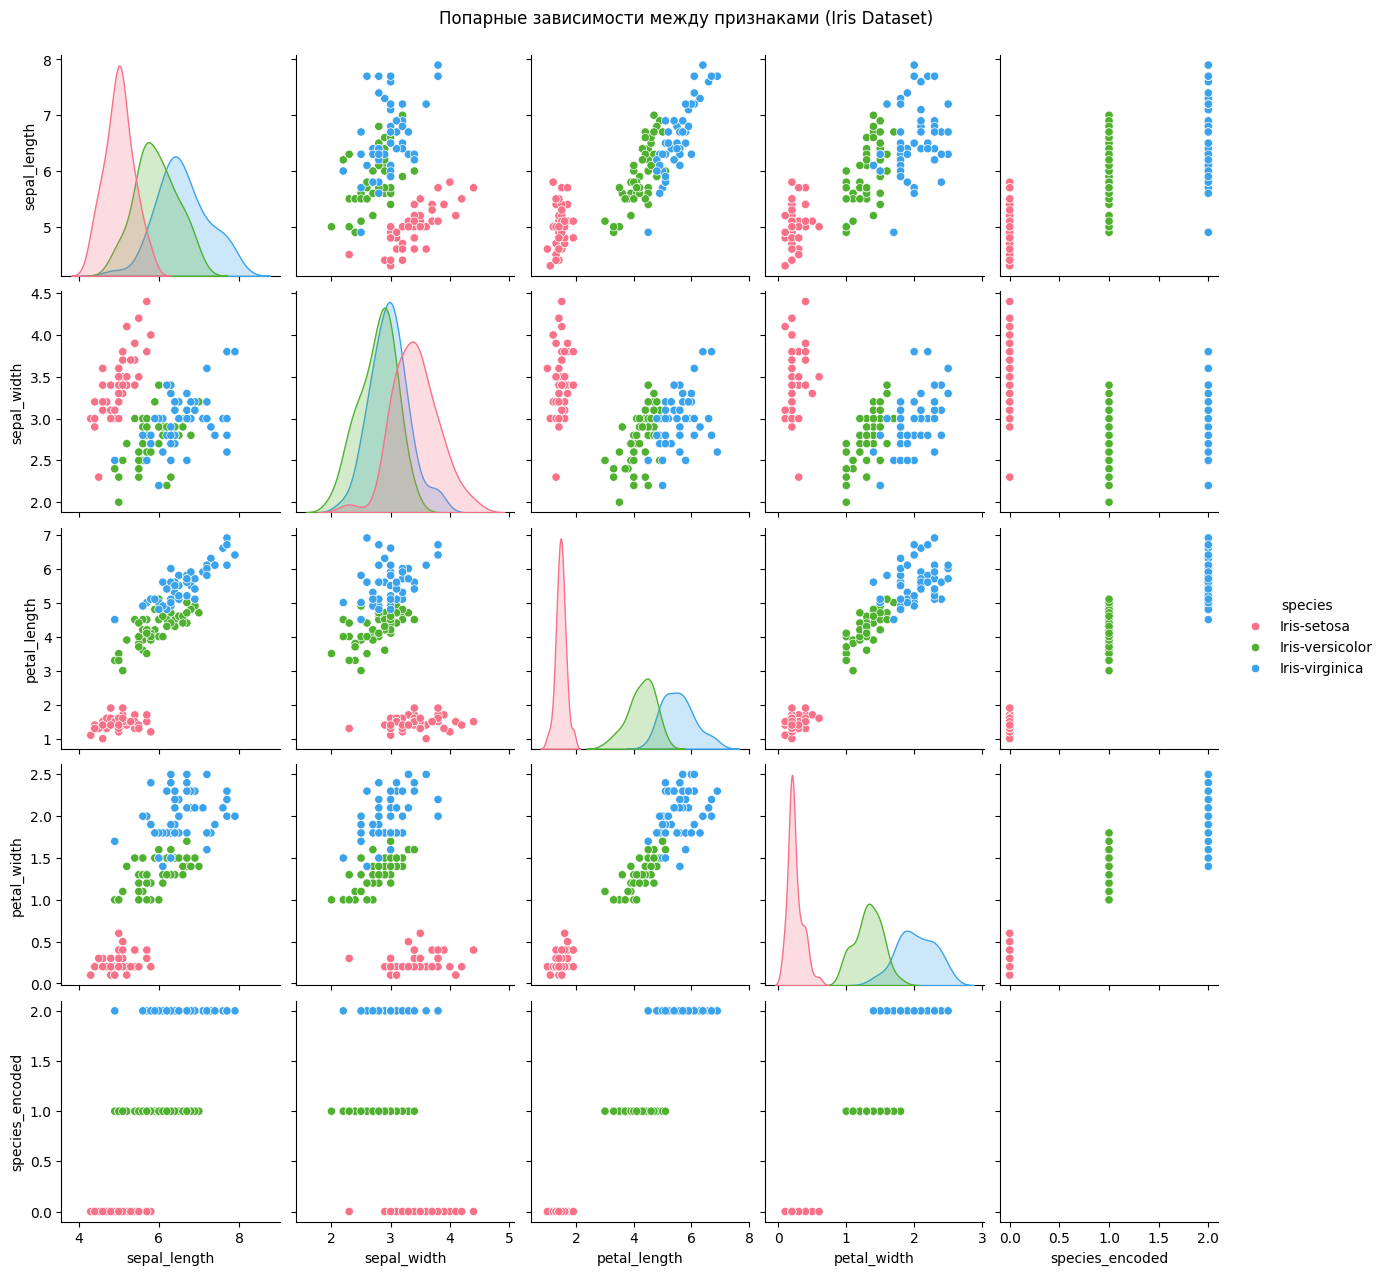

In [6]:
sns.pairplot(df, hue="species", diag_kind="kde", palette="husl")
plt.suptitle("Попарные зависимости между признаками (Iris Dataset)", y=1.02)
plt.show()

C:\Users\a\AppData\Local\Temp\ipykernel_10580\293928555.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="species", y="petal_length", palette="viridis")


Text(0.5, 1.0, 'Средняя длина лепестка по видам ирисов')

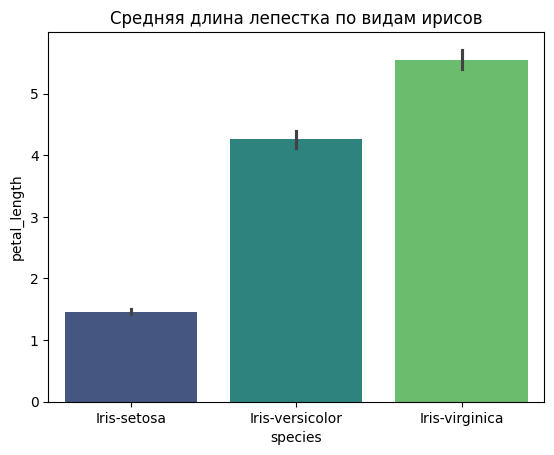

In [7]:
sns.barplot(data=df, x="species", y="petal_length", palette="viridis")
plt.title("Средняя длина лепестка по видам ирисов")

Text(0.5, 1.0, 'Взаимосвязь длины и ширины лепестков')

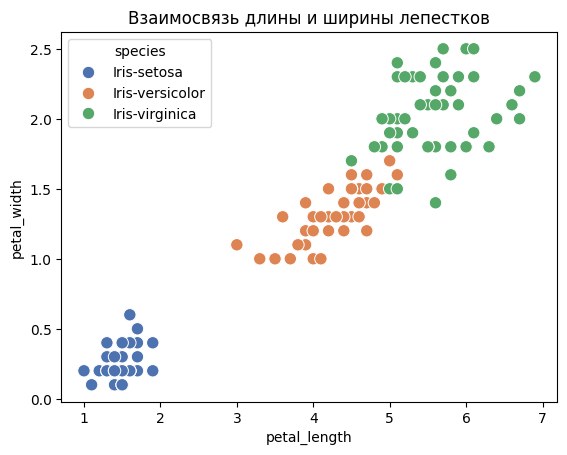

In [8]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', s=80, palette='deep')
plt.title("Взаимосвязь длины и ширины лепестков")

Text(0.5, 1.0, 'Сравнение длины чашелистиков и лепестков по видам')

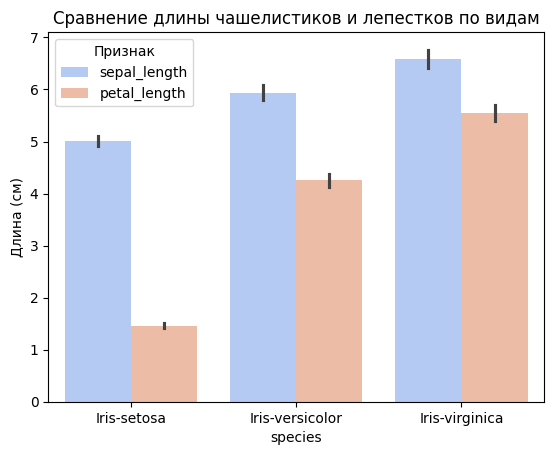

In [9]:
df_melted = df.melt(id_vars='species', value_vars=['sepal_length', 'petal_length'],
                    var_name='Признак', value_name='Длина (см)')
sns.barplot(data=df_melted, x='species', y='Длина (см)', hue='Признак', palette='coolwarm')
plt.title("Сравнение длины чашелистиков и лепестков по видам")

Схожесть кластеров с реальными метками: 1.000
0.5780114722111267


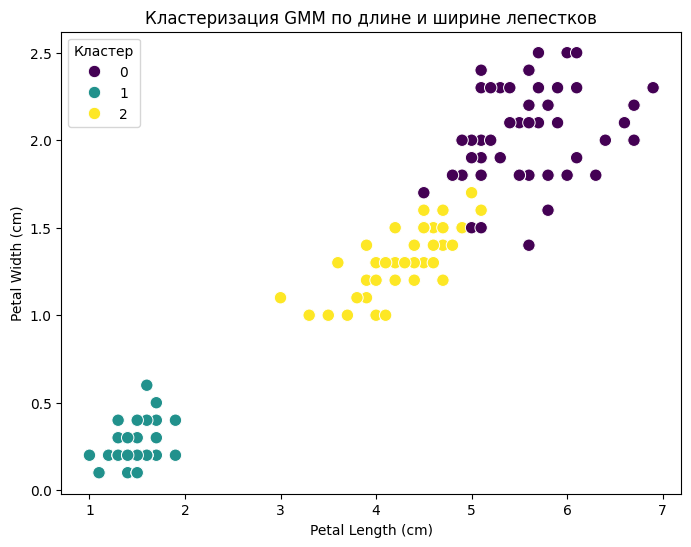

In [11]:
encoder = LabelEncoder()
y_true = encoder.fit_transform(df['species'])

gmm = GaussianMixture(n_components=3, random_state=42)
labels = gmm.fit_predict(df.drop('species', axis=1))

score = adjusted_rand_score(y_true, labels)
print(f"Схожесть кластеров с реальными метками: {score:.3f}")

X = df.drop('species', axis=1)
labels = gmm.fit_predict(X)
silhouette_gmm = silhouette_score(X, labels)
print(silhouette_gmm)

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='petal_length',
    y='petal_width',
    hue=labels,
    palette='viridis',
    s=80
)
plt.title("Кластеризация GMM по длине и ширине лепестков")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="Кластер")
plt.show()

In [12]:
X = df.drop('species', axis=1)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

encoder = LabelEncoder()
y_true = encoder.fit_transform(df['species'])

ari = adjusted_rand_score(y_true, labels)
silhouette = silhouette_score(X, labels)

print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"Silhouette Score: {silhouette:.3f}")

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='petal_length',
    y='petal_width',
    hue=labels,
    palette='viridis',
    s=80
)
plt.title("Кластеры K-Means по длине и ширине лепестков")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="Кластер")
plt.show()

NameError: name 'KMeans' is not defined

Adjusted Rand Index (ARI): 1.000
Silhouette Score: 0.482


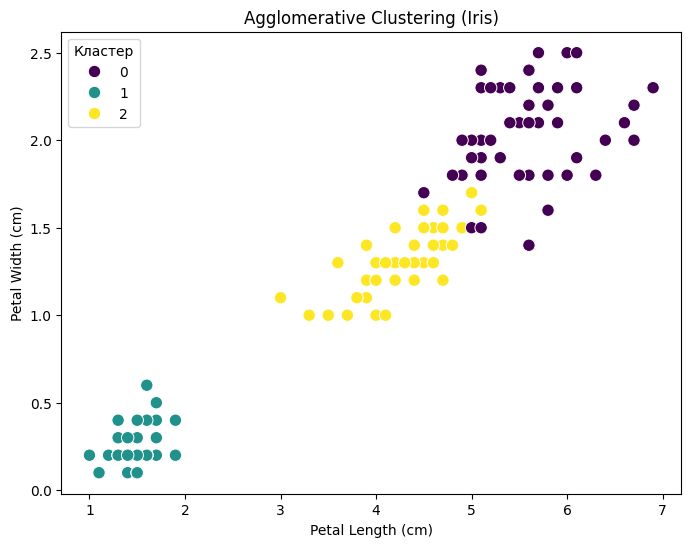

In [13]:
X = df.drop('species', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = AgglomerativeClustering(n_clusters=3)
labels = model.fit_predict(X_scaled)

encoder = LabelEncoder()
y_true = encoder.fit_transform(df['species'])

ari = adjusted_rand_score(y_true, labels)
silhouette = silhouette_score(X_scaled, labels)

print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"Silhouette Score: {silhouette:.3f}")

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['petal_length'],
    y=df['petal_width'],
    hue=labels,
    palette='viridis',
    s=80
)
plt.title("Agglomerative Clustering (Iris)")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="Кластер")
plt.show()